In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

- X 가 array로 만들어짐

In [88]:
iris = datasets.load_iris()
X = iris.data #150x4

- 차례로 평균, 표준편차 구함

In [89]:
m = X.shape[0] #150
mean = np.zeros((4,1))
for i in range(4) :
    mean[i] = 1/m * np.sum(X[:,i])
std = np.zeros((4,1))
for i in range(4) :
    std[i] = 1/m * ((np.sum(X[:,i] - mean[i]))**2)

- 데이터 전처리

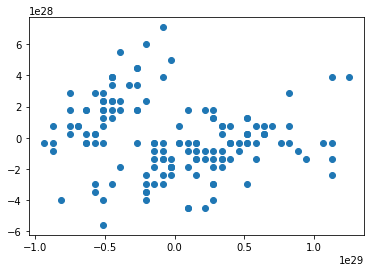

In [90]:
for i in range(4) :
    X[:,i] = (X[:,i] - mean[i]) / std[i]


plt.scatter(X[:,0], X[:,1])


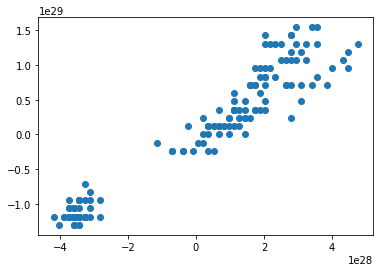

In [91]:
plt.scatter(X[:,2], X[:,3])

In [92]:
sigma = 1/m * X.T @ X
sigma.shape

(4, 4)

In [93]:
U,S,V = np.linalg.svd(sigma)
U.shape

(4, 4)

In [94]:
u_reduce = U[:,:2]
u_reduce.shape

(4, 2)

In [95]:
z = X @ u_reduce
z.shape

(150, 2)

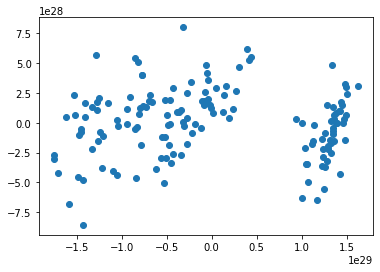

In [96]:
plt.scatter(z[:,0], z[:,1])

In [97]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

model = KMeans(n_clusters=3, algorithm='auto')
model.fit(z)
predict = pd.DataFrame(model.predict(z))
predict.columns=['predict']

z1 = pd.DataFrame(z[:,0])
z1.columns=['components1']
z2 = pd.DataFrame(z[:,1])
z2.columns=['components2']

result = pd.concat([z1,z2,predict],axis=1)
result

,components1,components2,predict
0,1.327862e+29,-1.734289e+28,1
1,1.359356e+29,6.124967e+27,1
2,1.422976e+29,9.947345e+27,1
3,1.437144e+29,1.753205e+28,1
4,1.357761e+29,-1.541804e+28,1
...,...,...,...
145,-1.410779e+29,4.933987e+27,2
146,-9.085970e+28,2.201836e+28,2
147,-1.050568e+29,2.551095e+27,2
148,-1.272972e+29,1.741551e+28,2


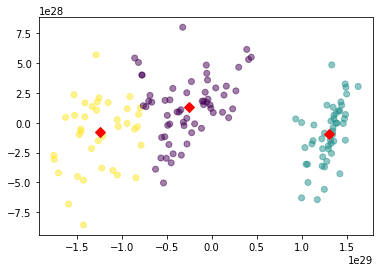

In [98]:
centers = pd.DataFrame(model.cluster_centers_,columns=['components1','components2'])
center_x = centers['components1']
center_y = centers['components2']

# scatter plot
plt.scatter(result['components1'],result['components2'],c=result['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [99]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']

ct = pd.crosstab(labels['labels'],result['predict'])
ct

predict,0,1,2
labels,,,
0,0,50,0
1,49,0,1
2,12,0,38
